# Fraud Detection Neural Network

Dataset: https://www.kaggle.com/datasets/whenamancodes/fraud-

Features are gathered using PCA. However, due to confidentiality issues, original information about them cannot be provided.

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

## Loading in the Data

In [3]:
df = pd.read_csv("creditcard.csv")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Preparation

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# Finding the any null values
cov_null = [col for col in df if df[col].isnull().any()]
print(cov_null)

# Finding the number of frauds and not fraud
df.Class.value_counts()

# We have an unbalanced data set so we need to split data accordingly:
# X_bs -> X before scaling
X_bs = df.iloc[0:, 1:-1]
y = df.iloc[0:, -1:]


# Scaling the X matrix
scaler = StandardScaler()
X = scaler.fit_transform(X_bs)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size = .7, stratify = y, random_state = 8)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size = .5, stratify = y_temp, random_state = 8)


# Oversmapling for the training dataset
sm = SMOTE(random_state = 9)
X_train, y_train = sm.fit_resample(X_train, y_train)


[]


## Neural Network Model Setup and Training

In [ ]:


# ep is epochs and bs stands for batch size
def model_train(X_train, y_train, nodes, ep, bs ):
    model = keras.Sequential([
        layers.Dense(nodes, activation = "relu", input_shape = [30]),
        layers.Dropout(.3),
        layers.Dense(nodes, activation = "relu"),
        layers.Dense(1, activation = "sigmoid")
    ])

    model.compile(
        optimizer = "adam",
        loss = "binary_crossentropy",
        metrics = ["binary_accuracy"]
    )

    history = model.fit(
        X_train, y_train,
        validation_data = (X_val, y_val),
        batch_size = bs,
        epochs = ep,
        verbose = 0
    )

    return model, history





In [ ]:
# Brute Force to find the relatively best structure for the neural network

lowest_val_loss = float("inf")
optimal_model = None
optimal_history = None

optimal_params = [0, 0, 0]
# [e, b, n]

ep_sizes = [3, 6, 8, 10, 15]
batch_sizes = [350, 400, 500, 750]
nodes = [12, 15, 19, 30]

for ep in ep_sizes:
    for bs in batch_sizes:
        for n in nodes:
            res_model, res_history = model_train(X_train, y_train, n, ep, bs)
            val_loss = res_model.evaluate(X_val, y_val, verbose = 0)[0]

            if val_loss < lowest_val_loss:
                lowest_val_loss = val_loss
                optimal_model = res_model
                optimal_history = res_history

                optimal_params[0] = ep
                optimal_params[1] = bs
                optimal_params[2] = n

# epochs = 6, batch_size = 750, nodes = 30


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

[6, 750, 30]


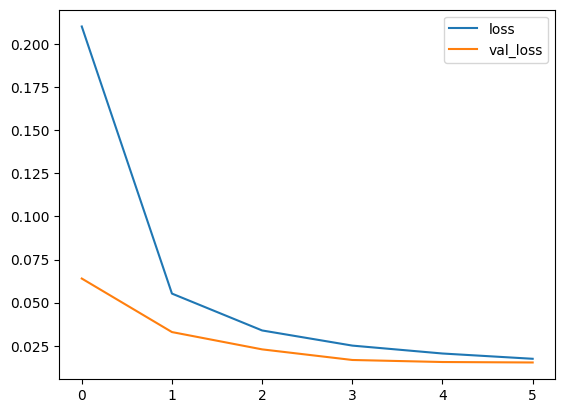

In [23]:
optimal_history_df = pd.DataFrame(optimal_history.history)
optimal_history_df.loc[:10, ["loss", "val_loss"]].plot()
# Here, Identified that there is a point where the validation loss stops decreasing

print(optimal_params)

# Trying a New Model Architecture

In [146]:
from tensorflow.keras.callbacks  import EarlyStopping
from keras import regularizers

final_model = keras.Sequential([
        layers.Dense(70, activation = "relu", input_shape = [29]),
        layers.Dense(73, activation = "relu"),
        layers.Dense(73, activation = "relu", kernel_regularizer = "l1"),
        layers.Dense(73, activation = "relu"),
        layers.Dense(1, activation = "sigmoid")
    ])

final_model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["binary_accuracy"]
)

early_stopping = EarlyStopping (
    min_delta = .001,
    patience = 2,
    restore_best_weights = True
)

final_model_history = final_model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size = 450,
    epochs = 6,
    verbose = 0
)


final_model_history.history

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'binary_accuracy': [0.9847326874732971,
  0.9987539052963257,
  0.9992839694023132,
  0.9994171261787415,
  0.9995477795600891,
  0.9996055960655212],
 'loss': [0.49522173404693604,
  0.032614000141620636,
  0.014370986260473728,
  0.012002380564808846,
  0.010757370851933956,
  0.00998410303145647],
 'val_binary_accuracy': [0.9949907660484314,
  0.9981274008750916,
  0.9983380436897278,
  0.9985253214836121,
  0.9988998174667358,
  0.998970091342926],
 'val_loss': [0.034438714385032654,
  0.022763578221201897,
  0.019353825598955154,
  0.018841389566659927,
  0.018719200044870377,
  0.018679514527320862]}

<Axes: >

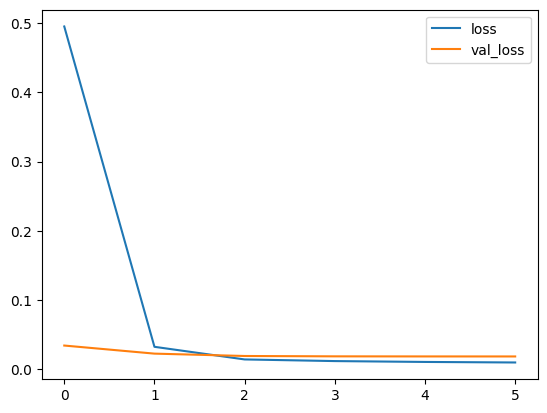

In [147]:
# Plot the final model
final_history_df = pd.DataFrame(final_model_history.history)
final_history_df.loc[:10, ["loss", "val_loss"]].plot()

# Accuracy Report

In [148]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)
y_pred = (y_pred > 0.75).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.74      0.86      0.80        74

    accuracy                           1.00     42722
   macro avg       0.87      0.93      0.90     42722
weighted avg       1.00      1.00      1.00     42722

